# Pandas

* As stated by Pandas site: 
    
    ***Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.***

* Pandas provide an easy interface and set of functions to manipulate 1-D data, called series and 2-Dimensional data called Dataframe.
* It is possible to play with index to represent multi-Dimension data as well.

In [1]:
separator = "\n###############\n"

In [2]:
# importing Pandas
import pandas as pd

* Pandas provide 2 powerful Data structures:
    1. Series - Equivalent to a list
    2. Dataframe - Equivalent to a Table

* You can think of Pandas dataframe as a grouping of Pandas Series, where each column represents a series.

## Pandas Series

In [3]:
pds = pd.Series([1,2,3,4,5])
pds

# * Here [1,2,3,4,5] represents the actual data.
# * [0 - 4] represents the index or row number. As like other python
#   data structures, you can use this index to access a particular row.
# * dtype is data type. For this case it is integer of 64 bits.

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [4]:
pds = pd.Series([1,2,3,4,5, 'a'])
pds

0    1
1    2
2    3
3    4
4    5
5    a
dtype: object

#### Creating a Series

In [5]:
# From a scalar value
print(pd.Series(5))
print(separator)
print(pd.Series(5, index = range(5)))

# below is not possible
# print(pd.Series([5], index = range(5)))

0    5
dtype: int64

###############

0    5
1    5
2    5
3    5
4    5
dtype: int64


In [6]:
# Creating a series from an iterator
print(pd.Series(range(3, 15, 3)))

print(pd.Series(tuple(map(float, range(3, 8))), index = range(11,16)))

0     3
1     6
2     9
3    12
dtype: int64
11    3.0
12    4.0
13    5.0
14    6.0
15    7.0
dtype: float64


In [7]:
# Creating a series from a dictionay
state_capital = {'West Bengal': 'Kolkata', 'Delhi': 'Delhi', 'Maharashtra': 'Mumbai', 'Karnataka': 'Bangalore'}
print(pd.Series(state_capital))

## Try these
print(separator)
print(pd.Series(state_capital, index=range(4)))
print(separator)


print(pd.Series(state_capital, index = list(state_capital.keys()) + ['ABC']))
print(separator)
print(pd.Series(state_capital, index = sorted(list(state_capital.keys()) + ['ABC'])))

West Bengal      Kolkata
Delhi              Delhi
Maharashtra       Mumbai
Karnataka      Bangalore
dtype: object

###############

0    NaN
1    NaN
2    NaN
3    NaN
dtype: object

###############

West Bengal      Kolkata
Delhi              Delhi
Maharashtra       Mumbai
Karnataka      Bangalore
ABC                  NaN
dtype: object

###############

ABC                  NaN
Delhi              Delhi
Karnataka      Bangalore
Maharashtra       Mumbai
West Bengal      Kolkata
dtype: object


#### It is possible to assign:
    1. a specific name to Series
    2. a speicific datatype - any numpy datatype is valid
    3. custom index.

In [8]:
pds2 = pd.Series([1,2,3,4,5], name='list_data', index=list('ABCDE'), dtype='f8')
pds2

A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
Name: list_data, dtype: float64

#### Accessing individual elements to the pandas Series.

In [9]:
# You can do it in multiple ways
print(pds2)
print(pds)


# print("1. using index value directly:")
# print("pds2  : ", pds2['B'])
# print("pds  : ", pds[1])

print(separator)
# print("2. using loc (location) function of the series:")
# print("pds2  : ", pds2.loc['B'])
# print("pds : ", pds.loc[1])

# Errorneous indexing
# print("pds2  : ", pds2.loc[1])  # Datatype of index doesn't match
# print("pds : ", pds.loc['B'])   # Key error, index 'B' is not available.

# print(separator)
# print("# 3. using iloc (integer or index location) function of the Series:")
# pds2.iloc[1]
# print("pds2  : ", pds2.iloc[1])
# print("pds  : ", pds.iloc[1])

# print(separator)
# Behavior of loc and iloc in suffled indexing.
# df = pd.Series([0,2,1,3,4])
# df.sort_values(inplace=True)
# print(df)
# print(df.loc[2], df.iloc[2])


print(separator)
print("# . using get function of the Series:")
pds2.iloc[1]
print("pds2  : ", pds2.get(1)) # or 'B'
print("pds  : ", pds.get(1))

### Get doesn't return any error, if key is not present in Series. it returns the default value
print("get F: ", pds2.get('F'))


A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
Name: list_data, dtype: float64
0    1
1    2
2    3
3    4
4    5
5    a
dtype: object

###############


###############

# . using get function of the Series:
pds2  :  2.0
pds  :  2
get F:  None


In [10]:
import numpy as np

#### Appending more data to series

* You can only append a Series or DataFrame object.

In [11]:
print(pds2)
pds2.append(pd.Series(6))#, index=['F']))
pds2 = pds2.append(pd.Series([6], index=['F']))

A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
Name: list_data, dtype: float64


In [12]:
pds2.append(pd.Series([7], ['G']))

A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
F    6.0
G    7.0
dtype: float64

In [13]:
pds2

A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
F    6.0
dtype: float64

In [14]:
ps = pds.append(pd.Series([6,7,8]))#, ignore_index=True)
ps

0    1
1    2
2    3
3    4
4    5
5    a
0    6
1    7
2    8
dtype: object

In [15]:
print(ps.loc[1])
print(ps.iloc[1])

1    2
1    7
dtype: object
2


#### Converting Series to other formats.

In [16]:
print(pds.to_list())
print(pds2.to_list())

[1, 2, 3, 4, 5, 'a']
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [17]:
print(pds.to_dict())
print(pds2.to_dict())

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 'a'}
{'A': 1.0, 'B': 2.0, 'C': 3.0, 'D': 4.0, 'E': 5.0, 'F': 6.0}


In [18]:
pds.to_frame()

,0
0,1
1,2
2,3
3,4
4,5
5,a


In [19]:
pds.to_frame(name='values')

,values
0,1
1,2
2,3
3,4
4,5
5,a


In [20]:
pds2

A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
F    6.0
dtype: float64

In [21]:
pds2.to_frame()

,0
A,1.0
B,2.0
C,3.0
D,4.0
E,5.0
F,6.0


In [22]:
pds2.to_json(orient='values') # index (default), records, 'table', 'values'

'[1.0,2.0,3.0,4.0,5.0,6.0]'

In [23]:
pds2.to_numpy()

array([1., 2., 3., 4., 5., 6.])

#### Other useful functions

In [24]:
# sc = pd.Series(state_capital, index = list(state_capital.keys()) + ['ABC', 'DEF'])

In [25]:
pds2.ndim   # retrns number of dimensions, by default 1

1

In [26]:
pds2.shape # shape of the Series

(6,)

In [27]:
pds2.size # number of elements in the Series

6

In [28]:
pds2

A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
F    6.0
dtype: float64

In [29]:
print(pds2.hasnans) # if series contains any NaN (not a number) value

print(pd.Series(state_capital, index = list(state_capital.keys()) + ['ABC', 'DEF']))
pd.Series(state_capital, index = list(state_capital.keys()) + ['ABC', 'DEF']).hasnans

False
West Bengal      Kolkata
Delhi              Delhi
Maharashtra       Mumbai
Karnataka      Bangalore
ABC                  NaN
DEF                  NaN
dtype: object


True

In [30]:
print(pds2.empty)  # if series is empty

print(pd.Series(state_capital, index=range(4)))
print(pd.Series(state_capital, index=range(4)).empty) # NaNs are not equivalent to empty

print(pd.Series())
print(pd.Series().empty)

False
0    NaN
1    NaN
2    NaN
3    NaN
dtype: object
False
Series([], dtype: float64)
True


C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [31]:
print(pds2.keys()) # retutns all index keys or related function
print(pds.keys())

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
RangeIndex(start=0, stop=6, step=1)


In [32]:
print(pds2)
print(pds2.pop('E')) # removes given item (based on index) from series
print(pds2)

A    1.0
B    2.0
C    3.0
D    4.0
E    5.0
F    6.0
dtype: float64
5.0
A    1.0
B    2.0
C    3.0
D    4.0
F    6.0
dtype: float64


In [33]:
a = pd.Series([1, 1, 1, 1], index=['a', 'b', 'c', 'd'])
b = pd.Series([1, 2, 3, 4], index=['a', 'b', 'd', 'e'])
print(a + b)
print(a.add(b))

## Beware: add function converts values to NaN if indexes don't match. To correct this behavior always use fill_value attribute
a.add(b, fill_value=0)

a    2.0
b    3.0
c    NaN
d    4.0
e    NaN
dtype: float64
a    2.0
b    3.0
c    NaN
d    4.0
e    NaN
dtype: float64


a    2.0
b    3.0
c    1.0
d    4.0
e    4.0
dtype: float64

In [34]:
## Apply function: Apply the given function on all values of the the Series
# and returns a new series
#print(pds.apply(lambda x: x+10))

print(separator)
# You can define your own custom functions with arguments as well.
# 1st attribute is always the Series's value
def custom_function(x, y, z):
    return x + y + z

print(pds.apply(custom_function, args=(10,20,)))
print(pds.apply(custom_function, y= 10, z=20))

TypeError: can only concatenate str (not "int") to str

In [ ]:
# Agg or Aggregate: apply an aggregation function.
print(pds2.aggregate('min'))
print(pds2.agg(['min', 'max', 'sum']))

      
print(separator)
# You can define your own custom aggregation functions as well
# 1st arments is always series' value
def squared_sum(x, y=1):
    tot = 0
    for i in x:
        tot += i**2
    return tot + y

print(pds2.agg(squared_sum, y = 10))
print(separator)
print(pds2.agg(['min', 'max', 'sum', squared_sum]))


### Plotting Data

In [46]:
pds

0    1
1    2
2    3
3    4
4    5
dtype: object

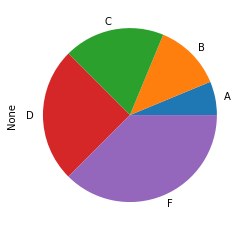

In [52]:
#pds.plot(kind='pie')
pds2.plot.pie()

# line, bar, barh, hist, box, kde, area, pie

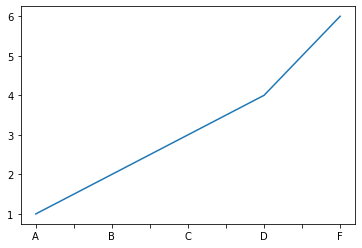

In [53]:
pds2.plot.line() # you can put other kinds as well. eg: pds2.plot.bar()

## Pandas DataFrame

* It provides Tabular or Matrix Structure

In [54]:
name = ['Chintu', 'Mintu', 'Pinky', 'Minty', 'Golu', 'Molu']
gender = ['M', 'M', 'F', 'F', 'M', 'M']
age = [6, 5, 6, 5, 6, 5]
marks = [80.0, 65.0, 90.0, 82.0, 75.0, 82.0]

In [55]:
pd.DataFrame([name, gender, age, marks])

,0,1,2,3,4,5
0,Chintu,Mintu,Pinky,Minty,Golu,Molu
1,M,M,F,F,M,M
2,6,5,6,5,6,5
3,80,65,90,82,75,82


In [57]:
pd.DataFrame(list(zip(name, gender, age, marks)) , columns = ['name', 'gender', 'age', 'marks'])

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Mintu,M,5,65.0
2,Pinky,F,6,90.0
3,Minty,F,5,82.0
4,Golu,M,6,75.0
5,Molu,M,5,82.0


In [58]:
d = {'name': name, 'gender': gender, 'age': age, 'marks': marks] #, 'name2':[1, 2,  4, 5]}
d

{'name': ['Chintu', 'Mintu', 'Pinky', 'Minty', 'Golu', 'Molu'],
 'gender': ['M', 'M', 'F', 'F', 'M', 'M'],
 'age': [6, 5, 6, 5, 6, 5],
 'marks': [80.0, 65.0, 90.0, 82.0, 75.0, 82.0]}

In [59]:
pd.DataFrame(d)

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Mintu,M,5,65.0
2,Pinky,F,6,90.0
3,Minty,F,5,82.0
4,Golu,M,6,75.0
5,Molu,M,5,82.0


In [63]:
d = [{'name': 'Chintu', 'gender': 'M', 'age': 6, 'marks': 80.0},
 {'name': 'Mintu', 'gender': 'M', 'age': 5, 'marks': 65.0},
 {'name': 'Pinky', 'gender': 'F', 'age': 6, 'marks': 90.0},
 {'name': 'Minty', 'gender': 'F', 'age': 5, 'marks': 82.0},
 {'name': 'Golu', 'gender': 'M', 'age': 6, 'marks': 75.0},
 {'name': 'Molu', 'gender': 'M', 'age': 5, 'marks': 82.0}] #, 'marks2': 80}]

students_df = pd.DataFrame(d)
students_df

,name,gender,age,marks,marks2
0,Chintu,M,6,80.0,NaN
1,Mintu,M,5,65.0,NaN
2,Pinky,F,6,90.0,NaN
3,Minty,F,5,82.0,NaN
4,Golu,M,6,75.0,NaN
5,Molu,M,5,82.0,80.0


In [62]:
pima_df = pd.read_csv('pima_indian_diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
# adf = pd.read_csv('CA-SS1\admissions.csv') # Errorneous input.
# adf = pd.read_csv(r'CA-SS1\admissions.csv') #provide flag to python interpreter, to not change the
                                            # string passed anyhow. Treat it as a raw string.
# adf = pd.read_csv('CA-SS1/admissions.csv') # Change the slash as per your OS's policy.
adf = pd.read_csv('CA-SS1\\admissions.csv') # Escape the Slash properly.

In [81]:
adf.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [69]:
url = "https://raw.githubusercontent.com/ikhurana/code-asylums/master/CA-SS1/Decision%20Tree%20and%20Random%20Forest/pima_indian_diabetes.csv"
pd.read_csv(url)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Common functions on DataFrame

In [79]:
students_df.info()  # Gives a summary of the type of data in data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    6 non-null      object 
 1   gender  6 non-null      object 
 2   age     6 non-null      int64  
 3   marks   6 non-null      float64
 4   marks2  1 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 368.0+ bytes


In [83]:
students_df.describe() # Gives the statstical summary of the dataframe

,age,marks,marks2
count,6.000000,6.000000,1.0
mean,5.500000,79.000000,80.0
std,0.547723,8.390471,NaN
min,5.000000,65.000000,80.0
25%,5.000000,76.250000,80.0
50%,5.500000,81.000000,80.0
75%,6.000000,82.000000,80.0
max,6.000000,90.000000,80.0


In [82]:
students_df

,name,gender,age,marks,marks2
0,Chintu,M,6,80.0,NaN
1,Mintu,M,5,65.0,NaN
2,Pinky,F,6,90.0,NaN
3,Minty,F,5,82.0,NaN
4,Golu,M,6,75.0,NaN
5,Molu,M,5,82.0,80.0


In [87]:
students_df.describe(include='all')

,name,gender,age,marks,marks2
count,6,6,6.000000,6.000000,1.0
unique,6,2,NaN,NaN,NaN
top,Golu,M,NaN,NaN,NaN
freq,1,4,NaN,NaN,NaN
mean,NaN,NaN,5.500000,79.000000,80.0
std,NaN,NaN,0.547723,8.390471,NaN
min,NaN,NaN,5.000000,65.000000,80.0
25%,NaN,NaN,5.000000,76.250000,80.0
50%,NaN,NaN,5.500000,81.000000,80.0
75%,NaN,NaN,6.000000,82.000000,80.0


In [86]:
pima_df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [88]:
pima_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
pima_df.shape  # Returns the tuple of # of rows and columns in dataframe

(768, 9)

In [91]:
pima_df.head(10) # list n columns from the top of the dataframe, default value is 5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [92]:
pima_df.tail(10) # list n columns from the end/bottom of the dataframe, default value is 5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [95]:
# list(pima_df.columns) # list all the columns of the Dataframe
pima_df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [96]:
pima_df.values  # returns all the values in np array format

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [97]:
type(pima_df['Pregnancies'])

pandas.core.series.Series

In [107]:
students_df.pop('marks2') # drops the given column name from dataframe
# students_df = pd.DataFrame(d)

TypeError: pop() missing 1 required positional argument: 'item'

In [100]:
students_df

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Mintu,M,5,65.0
2,Pinky,F,6,90.0
3,Minty,F,5,82.0
4,Golu,M,6,75.0
5,Molu,M,5,82.0


In [108]:
# drops given row or column from Dataframe
# 0 or 'index' stands for Index or rows, 1 or 'columns' stands for Column
# default is 0.
students_df.drop(['name', 'age'] , axis=1)

,gender,marks
0,M,80.0
1,M,65.0
2,F,90.0
3,F,82.0
4,M,75.0
5,M,82.0


In [111]:
pima_df[['Pregnancies', 'Glucose']]

,Pregnancies,Glucose
0,6,148
1,1,85
2,8,183
3,1,89
4,0,137
...,...,...
763,10,101
764,2,122
765,5,121
766,1,126


### Iterating and Accessing Dataframe

In [113]:
# # iterating over data using items column by column
# for label, content in students_df.items():
#     print("Label: ", label)
#     print("Content: ", content)

# iterating over data using iteritems column by column
# for label, content in students_df.iteritems():
#     print("Label: ", label)
#     print("Content: ", content)


# # iterating over data using iterrows row by row.
# # Note:
# #   1. Iterrows, returns each row, so it doens't preserve the datatype.
# #      In pandas, Datatypes are preserved at column level.
# #   2. As good practice, you should never modify the row, you are iterating 
# #      over. It can result in undefined behavior.
for idx, data in students_df.iterrows():
    print("Index: ", idx)
    print("Data: ", data)


Index:  0
Data:  name      Chintu
gender         M
age            6
marks         80
Name: 0, dtype: object
Index:  1
Data:  name      Mintu
gender        M
age           5
marks        65
Name: 1, dtype: object
Index:  2
Data:  name      Pinky
gender        F
age           6
marks        90
Name: 2, dtype: object
Index:  3
Data:  name      Minty
gender        F
age           5
marks        82
Name: 3, dtype: object
Index:  4
Data:  name      Golu
gender       M
age          6
marks       75
Name: 4, dtype: object
Index:  5
Data:  name      Molu
gender       M
age          5
marks       82
Name: 5, dtype: object


### Appending/ Merging data

In [114]:
d1 = [{'name': 'Chintu', 'gender': 'M', 'age': 6, 'marks': 80.0},
 {'name': 'Mintu', 'gender': 'M', 'age': 5, 'marks': 65.0},
 {'name': 'Pinky', 'gender': 'F', 'age': 6, 'marks': 90.0},
 {'name': 'Minty', 'gender': 'F', 'age': 5, 'marks': 82.0},
 {'name': 'Golu', 'gender': 'M', 'age': 6, 'marks': 75.0},
 {'name': 'Molu', 'gender': 'M', 'age': 5, 'marks': 82.0}]


d2 = [{'name': 'Chintu', 'gender': 'M', 'age': 6, 'marks': 80.0},
 {'name': 'Minky', 'gender': 'M', 'age': 5, 'marks': 65.0},
 {'name': 'Abby', 'gender': 'F', 'age': 5, 'marks': 86.0},
 {'name': 'Molu', 'gender': 'M', 'age': 5, 'marks': 82.0}]

sdf1 = pd.DataFrame(d1)
sdf2 = pd.DataFrame(d2)

In [115]:
sdf1

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Mintu,M,5,65.0
2,Pinky,F,6,90.0
3,Minty,F,5,82.0
4,Golu,M,6,75.0
5,Molu,M,5,82.0


In [116]:
sdf2

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Minky,M,5,65.0
2,Abby,F,5,86.0
3,Molu,M,5,82.0


In [120]:
sdf1.append(sdf2,  ignore_index=True)

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Mintu,M,5,65.0
2,Pinky,F,6,90.0
3,Minty,F,5,82.0
4,Golu,M,6,75.0
5,Molu,M,5,82.0
6,Chintu,M,6,80.0
7,Minky,M,5,65.0
8,Abby,F,5,86.0
9,Molu,M,5,82.0


In [119]:
sdf2

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Minky,M,5,65.0
2,Abby,F,5,86.0
3,Molu,M,5,82.0


In [ ]:
d3 = [{'name': 'Chintu', 'gender': 'M', 'age': 6, 'marks': 80.0, 'marks2': 80.0},
 {'name': 'Minky', 'gender': 'M', 'age': 5, 'marks': 80.0, 'marks2': 80.0},
 {'name': 'Abby', 'gender': 'F', 'age': 5, 'marks': 80.0, 'marks2': 80.0}]

sdf3 = pd.DataFrame(d3)

In [122]:
df = sdf1.append(sdf2)

In [123]:
df

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Mintu,M,5,65.0
2,Pinky,F,6,90.0
3,Minty,F,5,82.0
4,Golu,M,6,75.0
5,Molu,M,5,82.0
0,Chintu,M,6,80.0
1,Minky,M,5,65.0
2,Abby,F,5,86.0
3,Molu,M,5,82.0


In [126]:
df.drop_duplicates() #inplace=True)

In [127]:
df

,name,gender,age,marks
0,Chintu,M,6,80.0
1,Mintu,M,5,65.0
2,Pinky,F,6,90.0
3,Minty,F,5,82.0
4,Golu,M,6,75.0
5,Molu,M,5,82.0
1,Minky,M,5,65.0
2,Abby,F,5,86.0


### Merge/ Joins